In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)

# Support Vector Machines

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification or regression. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier.

## Mathematical Formulation

### Support Vector Classifier

#### Linearly Separable Binary Classification

Given $n$ training points, where each input $x_i$ has $m$ attributes (i.e. is of dimensionality $m$) and is in one of two classes $y_{i}=\pm1$, i.e our training data is of the form:

$$
\{x_i,y_{i}\} \ \text{where} \ i=1, \dots, n, x_i\in\Re^{m}, y_{i}\in\{+1,-1\}
$$

we assume the data is linearly separable, meaning that we can draw a line on a graph of $x_{1}$ vs $x_{2}$ separating the two classes when $m=2$ and a hyperplane on graphs of $x_{1}, x_{2}$, $\dots$, $x_{m}$ for when $m>2$.

This hyperplane can be described by $\langle w, x \rangle +b=0$ where $w$ is normal to the hyperplane and $\displaystyle \frac{b}{\Vert w\Vert}$ is the perpendicular distance from the hyperplane to the origin. 

Support vectors are the examples closest to the separating hyperplane and the aim of support vector machines is to orientate this hyperplane in such a way as to be as far as possible from the closest members of both classes.

<img src="./img/svc_hard.png" width=600/>

Referring to this figure, implementing a SVM boils down to selecting the variables $w$ and $b$ so that our training data can be described by:

$$
\begin{equation}
    \langle x_i, w \rangle +b\geq+1 \ \text{for} \ y_{i}=+1 \tag{1.1}
\end{equation}
$$
$$
\begin{equation}
    \langle x_i, w \rangle +b\leq-1 \ \text{for} \ y_{i}=-1 \tag{1.2}
\end{equation}
$$ 

These equations can be combined into:

$$
\begin{equation}
    y_{i}(\langle x_i, w \rangle +b) \geq 1 \ \forall_{i} \tag{1.3}
\end{equation}
$$ 

If we now just consider the points that lie closest to the separating hyperplane, i.e. the Support Vectors (shown in circles in the diagram), then the two planes $H_{1}$ and $H_{2}$ that these points lie on can be described by:

$$
\begin{equation}
    \langle x_i, w \rangle +b=+1 \ \text{for} \ H_{1} \tag{1.4}
\end{equation}
$$ 
$$
\begin{equation}
    \langle x_i, w \rangle +b=-1 \ \text{for} \ H_{2} \tag{1.5}
\end{equation}
$$ 

Referring to the previous figure, we define $d_{1}$ as being the distance from $H_{1}$ to the hyperplane and $d_{2}$ from $H_{2}$ to it. The hyperplane's equidistance from $H_{1}$ and $H_{2}$ means that $d_{1}=d_{2}-$ a quantity known as the SVM's margin. In order to orientate the hyperplane to be as far from the Support Vectors as possible, we need to maximize this margin.

Simple vector geometry shows that the margin is equal to $\displaystyle \frac{1}{\Vert w\Vert}$ and maximizing it subject to the constraint in (1.3) is equivalent to finding:

$$
\begin{equation}
    \begin{aligned}
        \min_w \quad & \Vert w \Vert \\
            \textrm{subject to} \quad & y_{i}(\langle x_i, w \rangle +b) \geq 1 \ \forall_{i}
    \end{aligned} \tag{1.6}
\end{equation}
$$

Minimizing $\Vert w\Vert$ is equivalent to minimizing $\displaystyle \frac{1}{2}\Vert w\Vert^{2}$, so we need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_w \quad & \frac{1}{2} \Vert w \Vert^2 \\
            \textrm{subject to} \quad & y_{i}(\langle x_i, w \rangle +b) \geq 1 \ \forall_{i}
    \end{aligned} \tag{1.7}
\end{equation}
$$

iter	feval	cost		gnorm		ls	it	astar		rho
   0	   1	1.0000e+00	1.4032e+00	 1	 0	1.0000e+00	5.1906e-01
   1	   2	3.7658e-02	1.4203e-01	 1	 0	1.0000e+00	5.7485e+01
   2	   3	2.3947e-02	2.4576e-02	 1	 0	1.0000e+00	2.7391e+03
   3	   4	2.3354e-02	1.3114e-02	 1	 0	1.0000e+00	3.5696e+03
   4	   5	2.3118e-02	1.0827e-02	 5	 0	1.5242e+00	1.7857e+03
   5	  10	2.2521e-02	2.3847e-02	 5	 0	1.5242e+00	2.9262e+03
   6	  15	2.1786e-02	1.9674e-02	 1	 0	1.0000e+00	3.0506e+03
   7	  16	2.1202e-02	5.0961e-03	 1	 3	2.3920e-01	1.5554e+03
   8	  20	2.0794e-02	7.3698e-03	 6	 8	1.5516e+00	1.3196e+04
   9	  34	2.0733e-02	5.5706e-03	 1	59	6.0315e-03	6.1455e+05
  10	  93	2.0732e-02	1.2341e-02	 1	 8	8.3751e-03	2.3390e+06
  11	 102	2.0732e-02	7.3140e-03	 1	899	2.0604e-01	2.6850e+11
  12	1001	2.0732e-02	7.3139e-03

custom svc accuracy score is 1.0
custom svc w is [-1.40053004  1.17746068]
custom svc b is 0.0


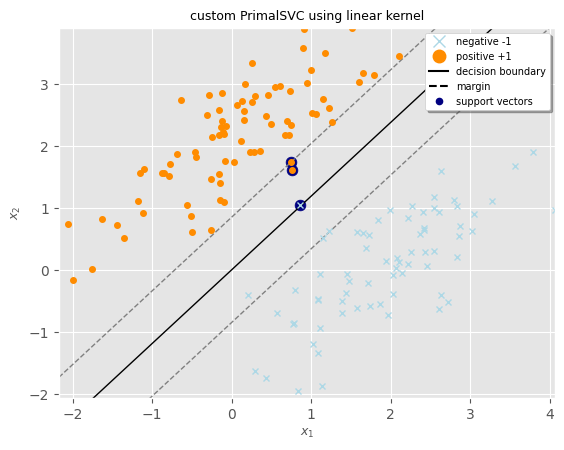

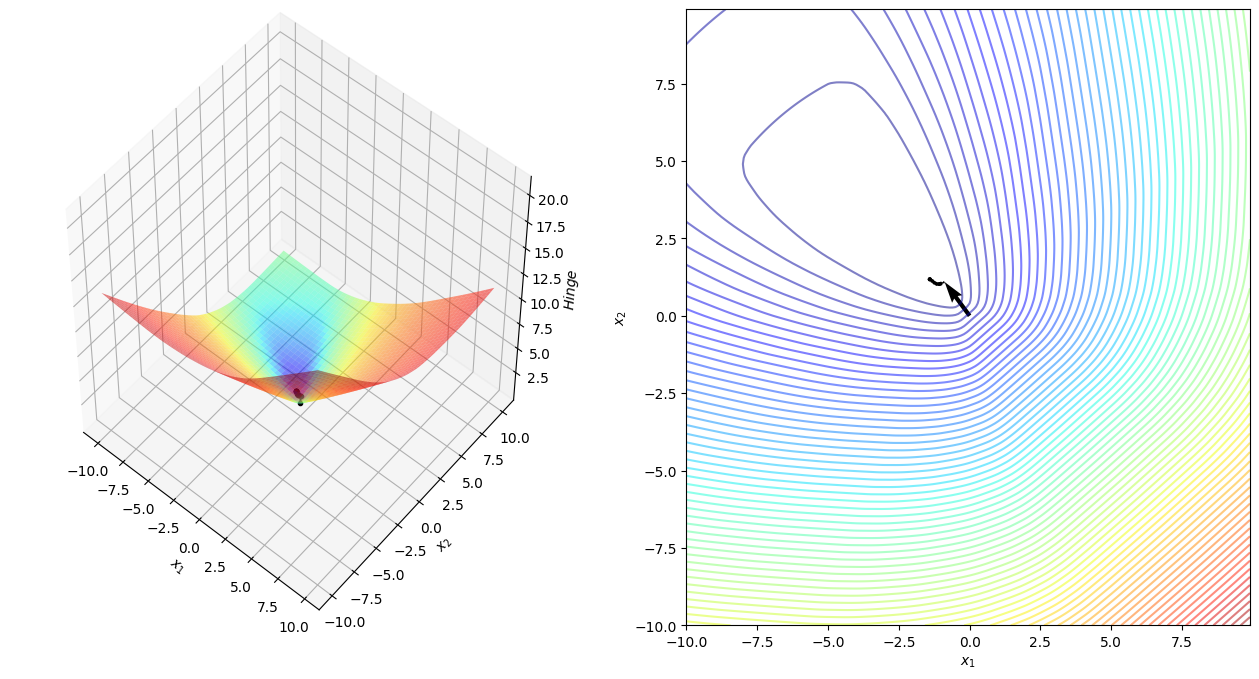

sklearn svc accuracy score is 1.0
sklearn svc w is [[-1.2841442   1.25301274]]
sklearn svc b is [-0.21791802]


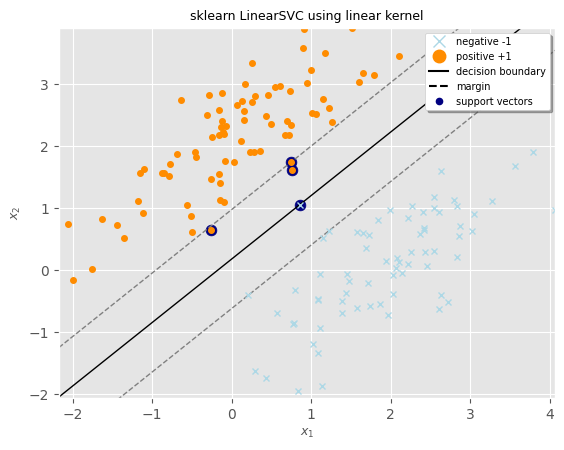

In [4]:
from optiml.ml.svm import PrimalSVC
from optiml.ml.svm.losses import hinge
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from optiml.optimization.unconstrained.line_search import BFGS
from optiml.optimization.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVC as SKLinearSVC
from sklearn.model_selection import train_test_split

X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVC(loss=hinge, penalty='l2', optimizer=BFGS, verbose=True).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

plot_trajectory_optimization(svc.loss, svc.optimizer, -10, 10, -10, 10)

svc = SKLinearSVC(loss='hinge', penalty='l2').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

In order to cater for the constraints in this minimization, we need to allocate them Lagrange multipliers $\alpha$, where $\alpha_{i}\geq 0 \ \forall_{i}$:

$$
\begin{align*}
    L_{P}\displaystyle &= \frac{1}{2}\Vert w\Vert^{2}-\alpha[y_{i}(\langle x_i, w \rangle +b)-1 \ \forall_{i}] \tag{1.8} \\
    &= \displaystyle \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}[y_{i}(\langle x_i, w \rangle +b)-1] \tag{1.9} \\
    &= \displaystyle \frac{1}{2}\Vert w\Vert^{2}-\sum_{i=1}^{n}\alpha_{i}y_{i}(\langle x_i, w \rangle +b)+\sum_{i=1}^{n}\alpha_{i} \tag{1.10}
\end{align*}
$$

We wish to find the $w$ and $b$ which minimizes, and the $\alpha$ which maximizes $L_P$ (whilst keeping $\alpha_{i}\geq 0 \ \forall_{i}$). We can do this by differentiating $L_{P}$ with respect to $w$ and $b$ and setting the derivatives to zero:

$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_i x_i \tag{1.11}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial b}=0\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.12}
\end{equation}
$$

Substituting (1.11) and (1.12) into (1.10) gives a new formulation which, being dependent on $\alpha$, we need to maximize:

$$
\begin{align*}
    L_{D}\displaystyle &= \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i,j}\alpha_{i}\alpha_{j}y_{i}y_{j} \langle x_i, x_j \rangle \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i}, \displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.13} \\
    &= \displaystyle \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\sum_{i,j}\alpha_{i}Q_{ij}\alpha_{j} \ \text{where} \ Q_{ij} = y_{i}y_{j} \langle x_{i}, x_{j} \rangle \tag{1.14} \\
    &= \sum_{i=1}^{n}\alpha_{i} - \frac{1}{2}\alpha^{T}Q\alpha \ \text{subject to} \ \alpha_{i}\geq 0 \ \forall_{i}, \displaystyle \sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{1.15}
\end{align*}
$$

This new formulation $L_{D}$ is referred to as the *dual* form of the *primary* $L_{P}$. It is worth noting that the dual form requires only the dot product of each input vector $x_{i}$ to be calculated, this is important for the *kernel trick* described later.

Having moved from minimizing $L_{P}$ to maximizing $L_{D}$, we need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2} \alpha^{T}Q\alpha-q^T\alpha \\
            \textrm{subject to} \quad & \alpha_{i}\geq 0 \ \forall_{i} \\ & y^T\alpha=0
    \end{aligned} \tag{1.16}
\end{equation}
$$

where $q$ is a vector of all ones.

This is a convex quadratic optimization problem, and we run a QP solver which will return $\alpha$ and from (1.11) will give us $w$. What remains is to calculate $b.$

Any data point satisfying (1.12) which is a Support Vector $x_{s}$ will have the form:

$$y_{s}(\langle x_{s}, w \rangle +b)=1$$

Substituting in (1.11):

$$y_{s}(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b)=1$$

Where $S$ denotes the set of indices of the support vectors. $S$ is determined by finding the indices $i$ where $\alpha_{i}>0$. Multiplying through by $y_{s}$ and then using $y_{s}^{2}=1$ from (1.1) and (1.2):

$$y_{s}^{2}(\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle +b)=y_{s}$$
$$b=y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle$$

Instead of using an arbitrary support vector $x_{s}$, it is better to take an average over all of the support vectors in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S}(y_{s}-\sum_{m\in S}\alpha_{m}y_{m} \langle x_{m}, x_{s} \rangle) \tag{1.17}
\end{equation}
$$

We now have the variables $w$ and $b$ that define our separating hyperplane's optimal orientation and hence our support vector machine. Each new point $x'$ is classified by evaluating:

$$
\begin{equation}
    y'=\displaystyle \operatorname{sgn}(\sum_{i=1}^{n}\alpha_i y_i\langle x_{i}, x' \rangle+b) \tag{3.11}
\end{equation}
$$

custom svc accuracy score is 1.0
custom svc found 6 support vectors from 150 examples
custom svc w is [-1.07996835  1.34914033]
custom svc b is -0.21589326536904851


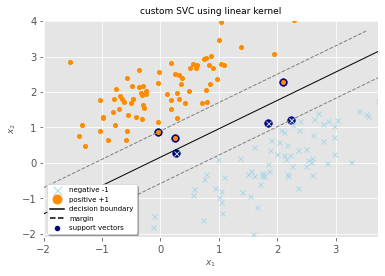

sklearn svc accuracy score is 1.0
sklearn svc found 6 support vectors from 150 examples
sklearn svc w is [[-1.07996851  1.34914031]]
sklearn svc b is [-0.21589324]


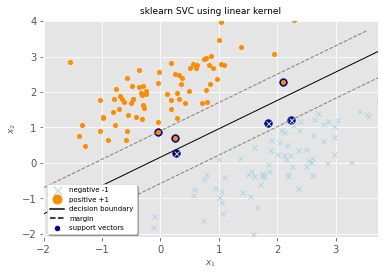

In [2]:
from optiml.ml.svm import SVC
from optiml.ml.utils import generate_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

X, y = generate_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

svc = SKLSVC(kernel='linear').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

#### Nonlinearly Separable Binary Classification

In order to extend the SVM methodology to handle data that is not fully linearly separable, we relax the constraints for (1.1) and (1.2) slightly to allow for misclassified points. This is done by introducing a positive slack variable $\xi_{i}, i=1$, $\dots$, $n$ :

$$
\begin{equation}
    \langle x_i, w \rangle +b\geq+1-\xi_{i} \ \text{for} \ y_{i}=+1 \tag{2.1}
\end{equation}
$$
$$
\begin{equation}
    \langle x_i, w \rangle +b\leq-1+\xi_{i} \ \text{for} \ y_{i}=-1 \tag{2.2}
\end{equation}
$$ 

$$\text{where} \ \xi_{i}\geq 0 \ \forall_{i}$$

Which can be combined into:

$$
\begin{equation}
    y_{i}(\langle x_i, w \rangle +b) \geq 1 - \xi_{i} \ \forall_{i} \text{where} \ \xi_{i}\geq 0 \ \forall_{i} \tag{2.3}
\end{equation}
$$

<img src="./img/svc_soft.png" width=600/>

In this *soft margin* SVM, data points on the incorrect side of the margin boundary have a penalty that increases with the distance from it. As we are trying to reduce the number of misclassifications, a sensible way to adapt our objective function (1.7) from previously, is to find:

$$
\begin{equation}
    \begin{aligned}
        \min \quad & \frac{1}{2} \Vert w \Vert^2 + C \sum_{i=1}^{n} \xi_{i} \\
            \textrm{subject to} \quad & y_{i}(\langle x_i, w \rangle +b) \geq 1 - \xi_{i} \ \forall_{i}
    \end{aligned} \tag{2.4}
\end{equation}
$$

Where the parameter $C$ controls the trade-off between the slack variable penalty and the size of the margin. Reformulating as a Lagrangian, which as before we need to minimize with respect to $w$, $b$ and $\xi_{i}$ and maximize with respect to $\alpha$ (where $\alpha_{i} \geq 0, \mu_{i} \geq 0 \ \forall_{i}$):

$$
\begin{equation}
    L_{P}\displaystyle = \frac{1}{2}\Vert w\Vert^{2}+C\sum_{i=1}^n\xi_{i}-\sum_{i=1}^n\alpha_{i}[y_{i}(\langle{x}_{i}, w \rangle+b)-1+\xi_{i}]-\sum_{i=1}^n\mu_{i}\xi_{i} \tag{2.5}
\end{equation}
$$

Differentiating with respect to $w$, $b$ and $\xi_{i}$ and setting the derivatives to zero:

$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}\alpha_{i}y_{i}x_i \tag{2.6}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial b}=0\Rightarrow\sum_{i=1}^{n}\alpha_{i}y_{i}=0 \tag{2.7}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial\xi_{i}}=0\Rightarrow C=\alpha_{i}+\mu_{i} \tag{2.8}
\end{equation}
$$

Substituting these in, $L_{D}$ has the same form as (1.15) before. However (2.8) together with $\mu_{i}\geq 0 \ \forall_{i}$, implies that $\alpha\leq C$. We therefore need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha} \quad & \frac{1}{2}\alpha^{T}Q\alpha-q^T\alpha \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}\leq C \ \forall_{i} \\ & y^T\alpha=0 
    \end{aligned} \tag{2.9}
\end{equation}
$$

where $q$ is a vector of all ones.

$b$ is then calculated in the same way as in (1.7) before, though in this instance the set of support vectors used to calculate $b$ is determined by finding the indices $i$ where $0\leq\alpha_{i}\leq C$.

custom svc accuracy score is 1.0
custom svc found 24 support vectors from 150 examples
custom svc w is [-0.88116895  0.83241555]
custom svc b is 0.06389081929586962


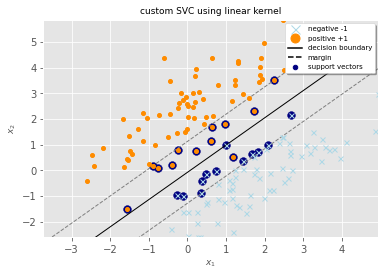

sklearn svc accuracy score is 1.0
sklearn svc found 24 support vectors from 150 examples
sklearn svc w is [[-0.88099764  0.83239736]]
sklearn svc b is [0.06384901]


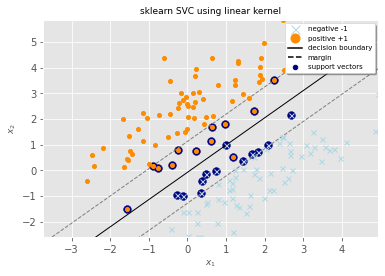

In [3]:
from optiml.ml.svm import SVC
from optiml.ml.utils import generate_linearly_separable_overlap_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

X, y = generate_linearly_separable_overlap_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='linear', C=0.1).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

svc = SKLSVC(kernel='linear', C=0.1).fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

### Nonlinear Support Vector Machines

When applying our SVM to linearly separable data we have started by creating a matrix $Q$ from the dot product of our input variables:

$$
\begin{equation}
    Q_{ij}=y_{i}y_{j}k(x_{i},\ x_{j})= \langle x_{i}, x_{j} \rangle=x_{i}^{T}x_{j} \tag{3.1}
\end{equation}
$$

$k(x_{i},x_{j})$ is an example of a family of functions called *kernel functions* where $k(x_{i},x_{j})=\langle x_{i}, x_{j} \rangle$ being known as a *linear* kernel. The set of kernel functions is composed of variants of (3.1) in that they are all based on calculating inner products of two vectors. This means that if the functions can be recast into a higher dimensionality space by some potentially nonlinear feature mapping function $x\rightarrow \phi(x)$, only inner products of the mapped inputs in the feature space need be determined without us needing to explicitly calculate $\phi$.

The reason that this *kernel trick* is useful is that there are many classification/regression problems that are not linearly separable/regressable in the space of the inputs $x$, which might be in a higher dimensionality feature space given a suitable mapping $x \rightarrow \phi(x)$.

#### Polynomial Kernel

The *polynomial* kernel is defined as: 

$$k(x_{i},x_{j})=(\gamma \langle x_i, x_j\rangle + r)^d$$ 

where $\gamma$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma*, $d$ by *degree* and $r$ by *coef0*.

custom svc accuracy score is 1.0
custom svc found 10 support vectors from 150 examples
custom svc b is -0.19102246627046332


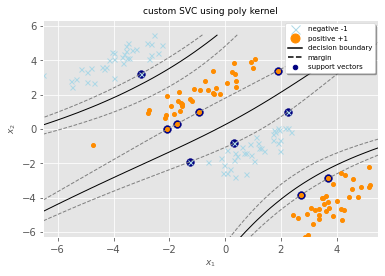

sklearn svc accuracy score is 1.0
sklearn svc found 9 support vectors from 150 examples
sklearn svc b is [-0.19134411]


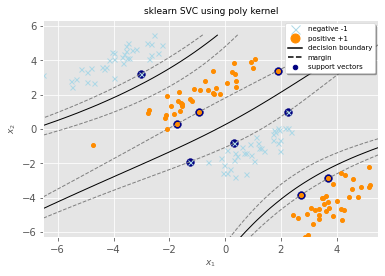

In [4]:
from optiml.ml.svm import SVC
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='poly', degree=3, coef0=3, gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

svc = SKLSVC(kernel='poly', degree=3, coef0=3, gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

#### Radial Basis Function Kernel

The *rbf* kernel is defined as: 

$$k(x_{i},x_{j})=\exp(-\frac{\|x_i-x_j\|^2}{2\sigma^2})$$

or, equivalently, as:

$$k(x_{i},x_{j})=\exp(-\gamma \|x_i-x_j\|^2)$$

where $\displaystyle \gamma=\frac{1}{2\sigma^2}$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma*.

custom svc accuracy score is 1.0
custom svc found 40 support vectors from 150 examples
custom svc b is -0.021803497249735914


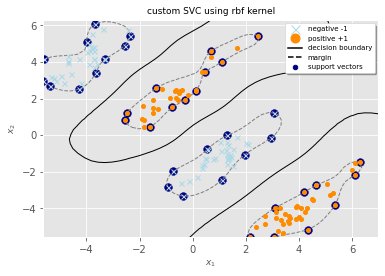

sklearn svc accuracy score is 1.0
sklearn svc found 40 support vectors from 150 examples
sklearn svc b is [-0.02181551]


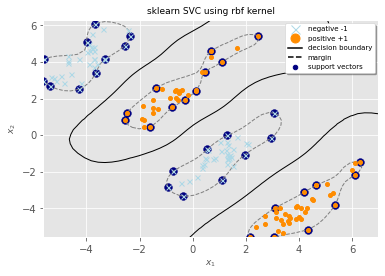

In [5]:
from optiml.ml.svm import SVC
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

svc = SKLSVC(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

#### Laplacian Kernel

The *laplacian* kernel is defined as: 

$$k(x_{i},x_{j})=\exp(-\frac{\|x_i-x_j\|_1}{2\sigma^2})$$

or, equivalently, as:

$$k(x_{i},x_{j})=\exp(-\gamma \|x_i-x_j\|_1)$$

where $\displaystyle \gamma=\frac{1}{2\sigma^2}$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma*.

custom svc accuracy score is 1.0
custom svc found 56 support vectors from 150 examples
custom svc b is -0.04753171508668072


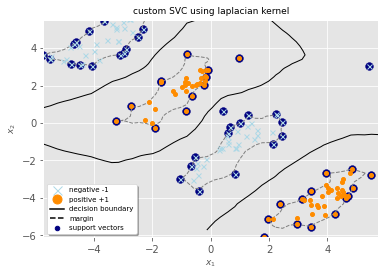

sklearn svc accuracy score is 1.0
sklearn svc found 55 support vectors from 150 examples
sklearn svc b is [-0.04768466]


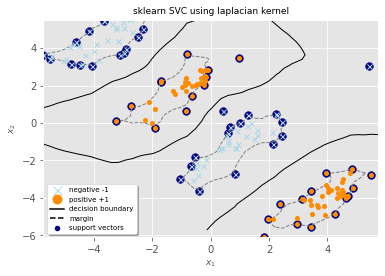

In [6]:
from optiml.ml.svm import SVC
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='laplacian', gamma='auto').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

from sklearn.metrics.pairwise import laplacian_kernel as laplacian

svc = SKLSVC(kernel=laplacian, gamma='auto').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

#### Sigmoid Kernel

The *sigmoid* kernel is defined as:

$$k(x_{i},x_{j})=\tanh(\gamma \langle x_i,x_j\rangle + r)$$ 

where $\gamma$ define how far the influence of a single training example reaches (low values meaning ‘far’ and high values meaning ‘close’) and is specified by keyword *gamma* and $r$ by *coef0*.

/home/donato/donato.meoli.95@gmail.com/MachineLearning&ComputationalMathematics/yase/yase/optimization/constrained/smo.py:138: UserWarning: kernel matrix is not positive definite
  warnings.warn('kernel matrix is not positive definite')


custom svc accuracy score is 0.74
custom svc found 144 support vectors from 150 examples
custom svc b is 0.22370192528789645


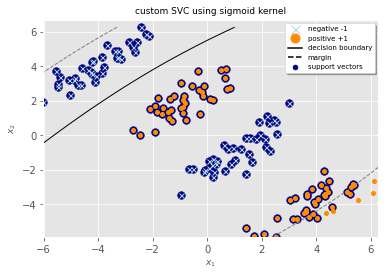

sklearn svc accuracy score is 0.74
sklearn svc found 144 support vectors from 150 examples
sklearn svc b is [0.22370163]


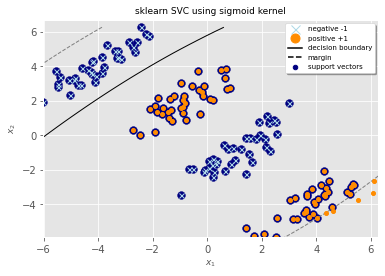

In [14]:
from optiml.ml.svm import SVC
from optiml.ml.utils import generate_non_linearly_separable_data, plot_svm_hyperplane

from sklearn.svm import SVC as SKLSVC
from sklearn.model_selection import train_test_split

X, y = generate_non_linearly_separable_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = SVC(kernel='sigmoid', coef0=4, gamma='scale').fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'custom svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

svc = SKLSVC(kernel='sigmoid', coef0=4, gamma='scale').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc found {len(svc.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svc b is {svc.intercept_}')
plot_svm_hyperplane(svc, X_train, y_train)

### Support Vector Regression

Instead of attempting to classify new unseen variables $x'$ into one of two categories $y'=\pm 1$, we now wish to predict a real-valued output for $y'$ so that our training data is of the form:

$$
\{x_i,y_i\} \text{where i}=1, \dots, n, x\in\Re^{m}, y_{i}\in\Re
$$

The regression SVM will use a more sophisticated penalty function than before, not allocating a penalty if the predicted value $y'_{i}$ is less than a distance $\epsilon$ away from the actual value $y_{i}$, i.e. if $|y_{i}-y'_{i}|<\epsilon$. 

<img src="./img/svr.png" width=600/>

Referring to this figure, the region bound by $y'_{i}\pm\epsilon \ \forall_{i}$ is called an $\epsilon$-insensitive tube. The other modification to the penalty function is that output variables which are outside the tube are given one of two slack variable penalties depending on whether they lie above $(\xi^{+})$ or below $(\xi^{-})$ the tube (where $\xi^{+}>0, \xi^{-}>0 \ \forall_{i}$):

$$
\begin{equation}
    y_{i}\leq y'_{i}+\epsilon+\xi^{+} \tag{3.1}
\end{equation}
$$
$$
\begin{equation}
    y_{i}\geq y'_{i}-\epsilon-\xi^{-} \tag{3.2}
\end{equation}
$$

The error function for SVM regression can then be written as:

$$
\begin{equation}
    \begin{aligned}
        \min \quad & \frac{1}{2}\Vert w\Vert^{2} + C \sum_{i=1}^{n}(\xi_{i}^{+}+\xi_{i}^{-}) \\
            \textrm{subject to} \quad & y_{i} - \langle x_i, w \rangle - b \leq \epsilon + \xi_{i}^{+} \ \forall_{i} \\ & \langle x_i, w \rangle + b - y_{i} \leq \epsilon + \xi_{i}^{-} \ \forall_{i}
    \end{aligned} \tag{3.3}
\end{equation}
$$

iter	feval	cost		gnorm		ls	it	astar		rho
   0	   1	3.7958e+01	5.6247e+01	 1	 2	7.2412e-01	4.3650e-04
   1	   3	1.5688e+01	6.0997e+00	 1	 0	1.0000e+00	2.2947e-02
   2	   4	1.2456e+01	1.0447e+00	 1	 0	1.0000e+00	1.0731e+00
   3	   5	1.1932e+01	4.8282e-15

custom svc accuracy score is 0.9998932576040597
custom svc w is [17.59733292 37.71861265]
custom svc b is 0.0


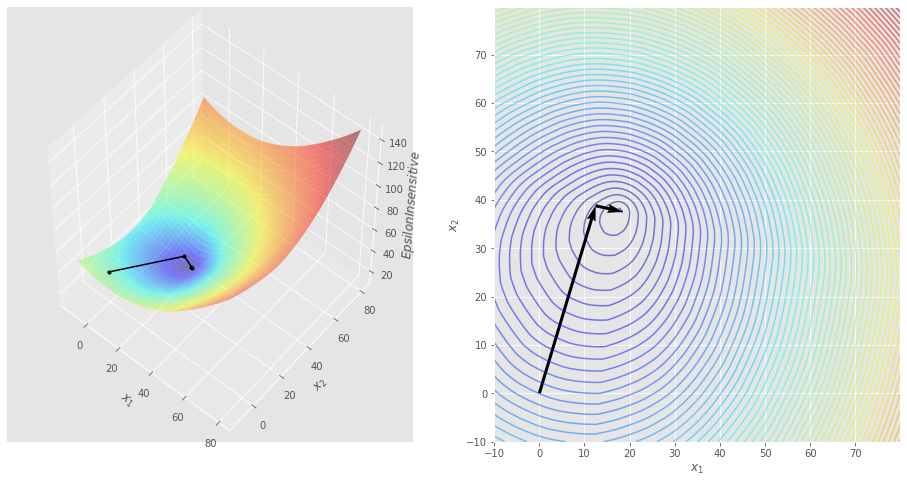

sklearn svc accuracy score is 1.0
sklearn svc w is [17.83098278 38.07925837]
sklearn svc b is [-1.54404636e-11]


In [3]:
from optiml.ml.svm import PrimalSVR
from optiml.ml.svm.losses import epsilon_insensitive

from optiml.optimization.unconstrained.line_search import BFGS
from optiml.optimization.utils import plot_trajectory_optimization

from sklearn.svm import LinearSVR as SKLinearSVR
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=2, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svc = PrimalSVR(loss=epsilon_insensitive, optimizer=BFGS, verbose=True).fit(X_train, y_train)
print(f'custom svc accuracy score is {svc.score(X_test, y_test)}')
print(f'custom svc w is {svc.coef_}')
print(f'custom svc b is {svc.intercept_}')
plot_trajectory_optimization(svc.loss, svc.optimizer, -10, 80, -10, 80)
# plot_svm_hyperplane(svc, X_train, y_train)

svc = SKLinearSVR(loss='epsilon_insensitive').fit(X_train, y_train)
print(f'sklearn svc accuracy score is {svc.score(X_test, y_test)}')
print(f'sklearn svc w is {svc.coef_}')
print(f'sklearn svc b is {svc.intercept_}')
# plot_svm_hyperplane(svc, X_train, y_train)

This needs to be minimized subject to the constraints $\xi^{+}\geq 0, \xi^{-}\geq 0 \ \forall_{i}$ and (3.1) and (3.2). In order to do this we introduce Lagrange multipliers $\alpha_{i}^{+}\geq 0, \alpha_{i}^{-}\geq 0, \mu_{i}^{+}\geq 0\mu_{i}^{-}\geq 0 \ \forall_{i}$:

$$
\begin{equation}
    \displaystyle L_{P}=\frac{1}{2}\Vert w\Vert^{2}+C \sum_{i=1}^n(\xi_{i}^{+}+\xi_{i}^{-})-\sum_{i=1}^n(\mu_{i}^{+}\xi_{i}^{+}+\mu_{i}^{-}\xi_{i}^{-})-\sum_{i=1}^n\alpha_{i}^{+}(\epsilon+\xi_{i}^{+}+y'_{i}-y_{i})-\sum_{i=1}^n\alpha_{i}^{-}(\epsilon+\xi_{i}^{-}-y'_{i}+y_{i}) \tag{3.4}
\end{equation}
$$

Substituting for $y_{i}$, differentiating with respect to $w, b, \xi^{+}$ and $\xi^{-}$ and setting the derivatives to $0$:

$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial w}=0\Rightarrow w=\sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})x_{i} \tag{3.5}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial b}=0\Rightarrow \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})=0 \tag{3.6}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial\xi_{i}^{+}}=0\Rightarrow C=\alpha_{i}^{+}+\mu_{i}^{+} \tag{3.7}
\end{equation}
$$
$$
\begin{equation}
    \displaystyle \frac{\partial L_{P}}{\partial\xi_{i}^{-}}=0\Rightarrow C=\alpha_{i}^{-}+\mu_{i}^{-} \tag{3.8}
\end{equation}
$$

Substituting (3.5) and (3.6) in, we now need to maximize $L_{D}$ with respect to $\alpha_{i}^{+}$ and $\alpha_{i}^{-}(\alpha_{i}^{+}\geq 0,\ \alpha_{i}^{-}\geq 0 \ \forall_{i})$ where:

$$
\begin{equation}
    L_{D}=\displaystyle \sum_{i=1}^{n}y_{i}(\alpha_{i}^{+}-\alpha_{i}^{-})-\epsilon\sum_{i=1}^{n}(\alpha_{i}^{+}+\alpha_{i}^{-})-\frac{1}{2}\sum_{i,j}(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_i, x_j \rangle(\alpha_{j}^{+}-\alpha_{j}^{-}) \tag{3.9}
\end{equation}
$$

Using $\mu_{i}^{+}\geq 0$ and $\mu_{i}^{-}\geq 0$ together with (3.7) and (3.8) means that $\alpha_{i}^{+}\leq C$ and $\alpha_{i}^{-}\leq C$. We therefore need to find:

$$
\begin{equation}
    \begin{aligned}
        \min_{\alpha^+,\alpha^-} \quad & \frac{1}{2}(\alpha^{+}-\alpha^{-})^TQ(\alpha^{+}-\alpha^{-})+\epsilon q^T(\alpha^{+}+\alpha^{-})-y^T(\alpha^{+}-\alpha^{-}) \\
            \textrm{subject to} \quad & 0\leq\alpha_{i}^{+},\alpha_{i}^{-}\leq C \ \forall_{i} \\ & q^T(\alpha^{+}-\alpha^{-})=0
    \end{aligned} \tag{3.10}
\end{equation}
$$

where $q$ is a vector of all ones.

Each new predictions $y'$ can be found using:

$$
\begin{equation}
    y'=\displaystyle \sum_{i=1}^{n}(\alpha_{i}^{+}-\alpha_{i}^{-})\langle x_{i}, x' \rangle+b \tag{3.11}
\end{equation}
$$

A set $S$ of Support Vectors $x_{s}$ can be created by finding the indices $i$ where $0\leq\alpha\leq C$ and $\xi_{i}^{+}=0$ (or $\xi_{i}^{-}=0$).

This gives us:

$$
\begin{equation}
    b=y_{s}-\displaystyle \epsilon-\sum_{m\in S}(\alpha_m^+ -\alpha_m^-) \langle x_{m}, x_{s} \rangle \tag{3.12}
\end{equation}
$$

As before it is better to average over all the indices $i$ in $S$:

$$
\begin{equation}
    b=\displaystyle \frac{1}{N_{s}}\sum_{s\in S}y_{s}-\epsilon-\sum_{m\in S}(\alpha_{m}^{+}-\alpha_{m}^{-})\langle x_{m}, x_{s} \rangle \tag{3.13}
\end{equation}
$$

custom svr r2 score is 0.8852899549902965
custom svr found 22 support vectors from 75 examples
custom svr b is 0.0753515020044255


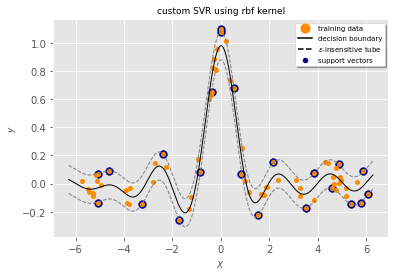

sklearn svr r2 score is 0.8849130610103564
sklearn svr found 22 support vectors from 75 examples
sklearn svr b is [0.07536684]


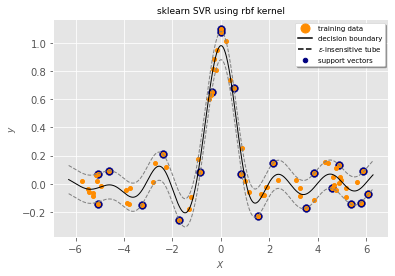

In [16]:
from optiml.ml.svm import SVR
from optiml.ml.utils import generate_non_linearly_regression_data, plot_svm_hyperplane

from sklearn.svm import SVR as SKLSVR
from sklearn.model_selection import train_test_split

X, y = generate_non_linearly_regression_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75)

svr = SVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'custom svr r2 score is {svr.score(X_test, y_test)}')
print(f'custom svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'custom svr b is {svr.intercept_}')
plot_svm_hyperplane(svr, X_train, y_train)

svr = SKLSVR(kernel='rbf', gamma='auto').fit(X_train, y_train)
print(f'sklearn svr r2 score is {svr.score(X_test, y_test)}')
print(f'sklearn svr found {len(svr.support_)} support vectors from {len(X_train)} examples')
print(f'sklearn svr b is {svr.intercept_}')
plot_svm_hyperplane(svr, X_train, y_train)